In [1]:
from math import ceil
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

We want to factor an RSA public key component (n) into two prime numbers (p, q).

In [3]:
def RSA_factor(n):
    p = 0
    q = 0
    for x in range(2, ceil(n/2)):
        if n % x == 0:
            p = n // x
            q = x
            break
    return p, q

(Brute force implementation)

In [4]:
ns = [0, 138659, 13045583, 89520689, 1210605589, 4199678809, 10804344527, 57881082689, 126695222113, 208194176089]
ts = []

for n in ns:
  t1 = time.time()
  print(RSA_factor(n))
  t2 = time.time()
  ts.append(t2 - t1)
  print("Factoring takes {:.10f} seconds".format(t2 - t1))

(0, 0)
Factoring takes 0.0042920113 seconds
(443, 313)
Factoring takes 0.0000863075 seconds
(3643, 3581)
Factoring takes 0.0005519390 seconds
(9721, 9209)
Factoring takes 0.0029475689 seconds
(35089, 34501)
Factoring takes 0.0153429508 seconds
(64901, 64709)
Factoring takes 0.0201127529 seconds
(104047, 103841)
Factoring takes 0.0266330242 seconds
(240829, 240341)
Factoring takes 0.0562183857 seconds
(356387, 355499)
Factoring takes 0.0901088715 seconds
(456283, 456283)
Factoring takes 0.1133098602 seconds


Finding the time it takes to factor ns of different magnitudes (added (0,0) because factoring the first number was iffy).

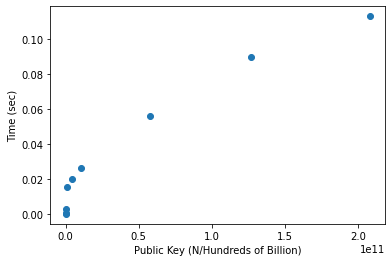

In [5]:
ns = ns[1:]
ts = ts[1:]

data = {'n' : np.asarray(ns),
     't' : np.asarray(ts)}

df = pd.DataFrame(data)
df.set_index('n')


plt.scatter(df['n'], df['t'])
plt.xlabel("Public Key (N/Hundreds of Billion)")
plt.ylabel("Time (sec)")

plt.show()

Comparing the time taken to factor the ns to the magnitude of the number. 